Variation Message Passing
Frequentist consistency of variational Bayes for Finite Gaussian Mixtures

In [1]:
from multidynet.datasets import load_icews
from bfase import BayesianFASE
from bfase.bspline import bspline_basis
from bfase.bfase import dynamic_adjacency_to_vec

In [2]:
Y, countries, layer_labels, time_labels = load_icews()
Y = Y[1]  # material conflict
time_points = np.arange(Y.shape[0])
time_points = time_points / time_points[-1]
y = dynamic_adjacency_to_vec(Y)

In [3]:
Y.shape

(12, 65, 65)

In [15]:
model = BayesianFASE(n_features=5, n_knots=10).sample(
    Y, time_points, n_warmup=500, n_samples=500)

warmup:   3%|█▌                                                      | 29/1000 [00:09<05:27,  2.97it/s, 1023 steps of size 8.27e-03. acc. prob=0.71]


KeyboardInterrupt: 

In [5]:
from sklearn.metrics import roc_auc_score

probas = model.predict_proba()

roc_auc_score(y.ravel(), probas.ravel())

0.9186414199353496

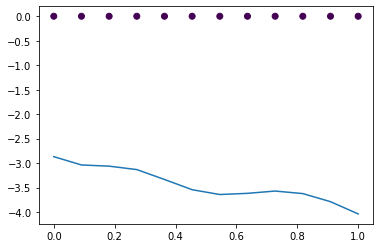

In [6]:
from scipy.special import logit


i = 100
plt.scatter(time_points, np.zeros_like(time_points), c=y[:, i])
plt.plot(time_points, logit(probas[:, i]))


In [8]:
ts = np.linspace(0, Y.shape[0]-1, num=30)/10

In [9]:
ts

array([0.        , 0.03793103, 0.07586207, 0.1137931 , 0.15172414,
       0.18965517, 0.22758621, 0.26551724, 0.30344828, 0.34137931,
       0.37931034, 0.41724138, 0.45517241, 0.49310345, 0.53103448,
       0.56896552, 0.60689655, 0.64482759, 0.68275862, 0.72068966,
       0.75862069, 0.79655172, 0.83448276, 0.87241379, 0.91034483,
       0.94827586, 0.9862069 , 1.02413793, 1.06206897, 1.1       ])

In [10]:
probas = model.predict_proba(time_points=ts)

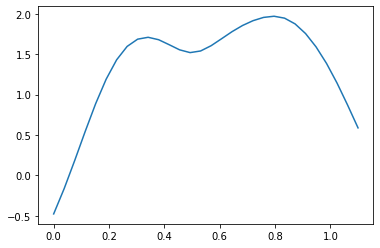

In [11]:
from scipy.special import logit


plt.plot(ts, logit(probas[:, 0]))


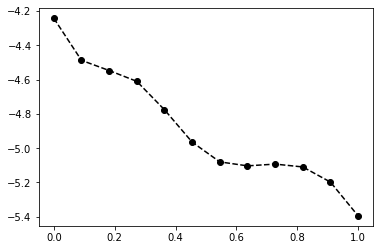

In [12]:
intercept = model.samples_['intercept'].mean(axis=0)

plt.plot(time_points, intercept, 'ko--')

In [11]:
ts.shape

(30,)

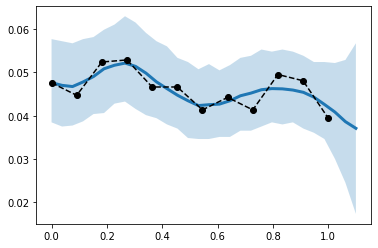

In [13]:
from dyneigenmodel.dynamic_gof import density, transitivity

res = model.posterior_predictive(density, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
d_obs = y.mean(axis=1)
plt.plot(ts, res.mean(axis=0), lw=3)
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.plot(time_points, d_obs, linestyle='--', marker='o', color='k')

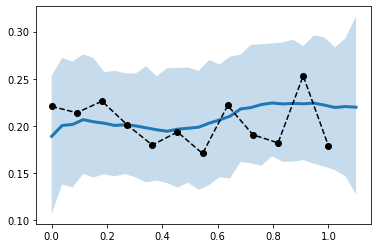

In [14]:
res = model.posterior_predictive(transitivity, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
d_obs = transitivity(y)
plt.plot(ts, res.mean(axis=0), lw=3)
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.plot(time_points, d_obs, linestyle='--', marker='o', color='k')

In [83]:
(1/np.sqrt(model.samples_['lambda'])).mean(axis=0)

array([0.83389477, 0.61509032, 0.5340208 , 0.51059662, 0.51229402,
       0.46770619, 0.47058719, 0.46156547, 0.46092452, 0.35884095])

In [84]:
a=model.samples_['sigma'].mean(axis=0)
order = np.argsort(np.abs(a))[::-1]
a[order]

array([-1.35360366,  0.80865697,  0.77332427, -0.74766834,  0.56374667,
       -0.38507487,  0.37635161,  0.37287878,  0.36862144,  0.29500225,
        0.28425206,  0.26107482,  0.25758846,  0.25116029,  0.24017252,
        0.23897799,  0.17123541,  0.168416  ,  0.15684539,  0.15580754,
        0.14971872,  0.14252288,  0.14172195,  0.13823861,  0.137659  ,
        0.13559325,  0.13374928,  0.13208145,  0.13176589,  0.12917084,
        0.12780955,  0.12369489,  0.11844066,  0.11426484,  0.11042389,
        0.10774695,  0.10711857,  0.10511296,  0.10502689,  0.10346856,
        0.10153848,  0.09693826,  0.09630746,  0.09580955,  0.09398199,
        0.09228242,  0.09177563,  0.08425175,  0.07792234,  0.07732125,
        0.07576437,  0.0755562 ,  0.07357616,  0.07180402,  0.06823068,
        0.06700815,  0.06667453,  0.0661518 ,  0.06247837,  0.05378355,
        0.03663359,  0.02484869,  0.01377218,  0.00682237,  0.00520442])

In [85]:
order

array([ 0, 46,  8,  4, 20,  5, 17, 55, 53, 27, 47, 60, 57,  6, 50, 59,  2,
       34, 48, 15, 45, 36, 14, 35, 22, 56, 64, 37, 41, 23, 44, 40, 38, 33,
       51, 18, 58, 61, 12, 39, 42, 24, 43, 19, 32,  9, 30, 21, 49,  7, 52,
       13, 31,  1, 10, 54,  3, 62, 28, 26, 63, 16, 25, 11, 29])

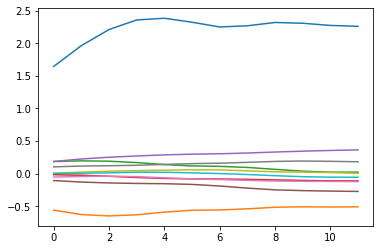

In [87]:
X = model.samples_['X'].mean(axis=0)
plt.plot(X[:,8])

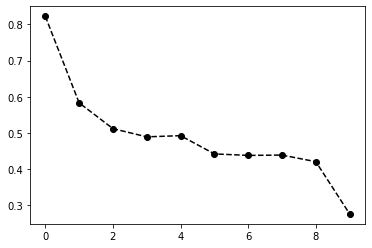

In [109]:
plt.plot(1/np.sqrt(model.samples_['lambda'].mean(axis=0)), 'ko--')

In [16]:
from multidynet.datasets import load_icews
from bfase import BayesianFASE
from bfase.bfase import dynamic_adjacency_to_vec
from bfase.datasets import synthetic_network

In [17]:
Y, time_points, probas, X = synthetic_network(n_nodes=25, n_time_points=200, length_scale=0.1)

In [41]:
model = BayesianFASE(n_features=2, n_knots=20).sample(Y, time_points, n_warmup=500, n_samples=500)

sample: 100%|███████████████████████████████████████████████████████| 1000/1000 [06:05<00:00,  2.73it/s, 511 steps of size 1.33e-02. acc. prob=0.91]


In [42]:
Z = model.samples_['intercept'].mean(axis=0)
probas_pred = model.predict_proba()

In [46]:
y = dynamic_adjacency_to_vec(Y)
roc_auc_score(y.ravel(), probas_pred.ravel())

0.7687096800587663

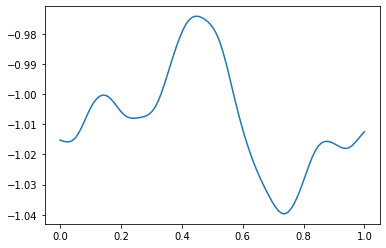

In [47]:
plt.plot(time_points, Z)
#plt.plot(time_points, X[:, 0, 0])

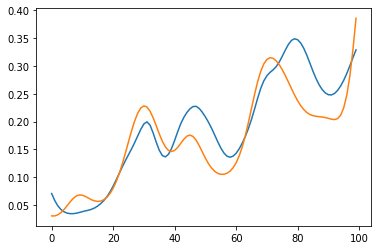

In [48]:
plt.plot(probas_pred[:, 1])
plt.plot(probas[:, 1])

In [49]:
ts = time_points

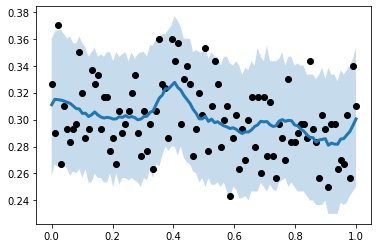

In [50]:
from dyneigenmodel.dynamic_gof import density, transitivity

res = model.posterior_predictive(density, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
y = dynamic_adjacency_to_vec(Y)
d_obs = y.mean(axis=1)
plt.plot(ts, res.mean(axis=0), lw=3)
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.scatter(time_points, d_obs, color='k')

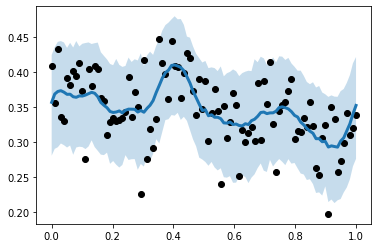

In [51]:
from dyneigenmodel.dynamic_gof import density, transitivity

res = model.posterior_predictive(transitivity, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
y = dynamic_adjacency_to_vec(Y)
d_obs = transitivity(y)
plt.plot(ts, res.mean(axis=0), lw=3)
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.scatter(time_points, d_obs, marker='o', color='k')